In [1]:
import sys
import pickle
sys.path.append("../tools/")
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
import numpy as np
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi'] 
#copied all features in from Udacity course
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                     'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                     'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi']
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

all_features = features_list + email_features + financial_features 
all_features.remove('email_address') 

C:\Users\d2wax\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Figuring out how many names and POIs are in the data set to start with

print('Number of employees in the Enron data set: %d' % (len(data_dict)))

poi_ct=0
for key, val in data_dict.items():
    if (val['poi'] == 1.0):
        poi_ct = poi_ct + 1
        
print ('POIs identified in the data: %d' % poi_ct)

Number of employees in the Enron data set: 146
POIs identified in the data: 18


In [3]:
#exploring available keys

pprint.pprint(list(data_dict.keys()))

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

In [4]:
### Task 2: Remove outliers

'''Removing outlying keys based on manual examination of the dataset above- including The Travel Agency... and 'Total'. 
Additionaly, removing email addresses as they will not add prediction value.'''
email_features.remove('email_address') 
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [5]:
#Checking my work:
pprint.pprint(list(data_dict.keys()))

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

In [6]:
pprint.pprint(all_features)

['poi',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees']


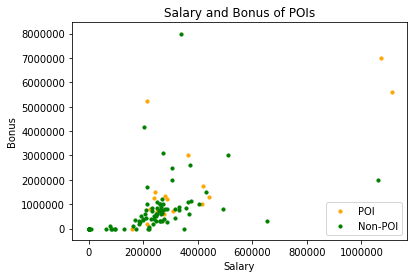

In [7]:
data = featureFormat(data_dict, all_features, sort_keys = False)
poi=data[:,0]
salary = data[:,6]
bonus = data[:,10]

plt.scatter(salary[poi==1],bonus[poi==1],c='orange',s=10,label='POI')
plt.scatter(salary[poi==0],bonus[poi==0],c='green',s=10,label='Non-POI')

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.legend(loc='lower right')
plt.title("Salary and Bonus of POIs")
plt.show()

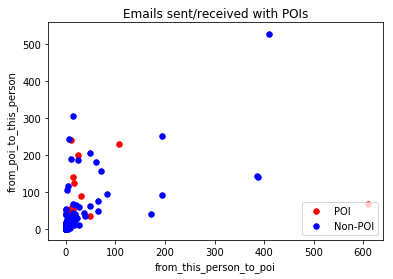

In [8]:
data2 = featureFormat(data_dict, all_features, sort_keys = True)
poi=data2[:,0]
from_this_person_to_poi = data2[:,4]
from_poi_to_this_person = data2[:,2]

plt.scatter(from_this_person_to_poi[poi==1],from_poi_to_this_person[poi==1],c='red',s=30,label='POI')
plt.scatter(from_this_person_to_poi[poi==0],from_poi_to_this_person[poi==0],c='blue',s=30,label='Non-POI')

plt.xlabel("from_this_person_to_poi")
plt.ylabel("from_poi_to_this_person")
plt.legend(loc='lower right')
plt.title("Emails sent/received with POIs")
plt.show()

In [9]:
#Print minimums and maximums to look for outliers
for feature in all_features:
    print feature
    feature = [item[feature] for k, item in 
    data_dict.iteritems() if not item[feature] == "NaN"]
    print ('min is: %d' % min(feature))
    print ('max is: %d' % max(feature))

poi
min is: 0
max is: 1
to_messages
min is: 57
max is: 15149
from_poi_to_this_person
min is: 0
max is: 528
from_messages
min is: 12
max is: 14368
from_this_person_to_poi
min is: 0
max is: 609
shared_receipt_with_poi
min is: 2
max is: 5521
salary
min is: 477
max is: 1111258
deferral_payments
min is: -102500
max is: 6426990
total_payments
min is: 148
max is: 103559793
loan_advances
min is: 400000
max is: 81525000
bonus
min is: 70000
max is: 8000000
restricted_stock_deferred
min is: -1787380
max is: 15456290
deferred_income
min is: -3504386
max is: -833
total_stock_value
min is: -44093
max is: 49110078
expenses
min is: 148
max is: 228763
exercised_stock_options
min is: 3285
max is: 34348384
other
min is: 2
max is: 10359729
long_term_incentive
min is: 69223
max is: 5145434
restricted_stock
min is: -2604490
max is: 14761694
director_fees
min is: 3285
max is: 137864


#### Noticed some negative values, decided to explore.
For the following code, I swapped various negative values from the list above and looked at names in subsequent code. To keep this short, I didn't save all of the various swaps I did.

In [10]:
outliers =[]
for key in data_dict.keys():
    if (data_dict[key]['deferral_payments']!='NaN')& (data_dict[key]['deferred_income']!='NaN'):
        if (int(data_dict[key]['deferred_income'])< 0):
            outliers.append(key)
print ("Outlier Names:",outliers)

('Outlier Names:', ['BAXTER JOHN C', 'PIPER GREGORY F', 'COLWELL WESLEY', 'MULLER MARK S', 'RIEKER PAULA H', 'DETMERING TIMOTHY J', 'LAY KENNETH L', 'GAHN ROBERT S', 'HAEDICKE MARK E', 'BELDEN TIMOTHY N', 'WASAFF GEORGE', 'ALLEN PHILLIP K', 'REYNOLDS LAWRENCE', 'FREVERT MARK A', 'BAY FRANKLIN R', 'BUY RICHARD B'])


In [11]:
#Examining one outlier
pprint.pprint(data_dict['BAXTER JOHN C'])

{'bonus': 1200000,
 'deferral_payments': 1295738,
 'deferred_income': -1386055,
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 6680544,
 'expenses': 11200,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 1586055,
 'other': 2660303,
 'poi': False,
 'restricted_stock': 3942714,
 'restricted_stock_deferred': 'NaN',
 'salary': 267102,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 5634343,
 'total_stock_value': 10623258}


In [12]:
### Task 3: Create new feature(s)
def calcluatePercent(messages, allMessages):
    percent = 0
    if (messages == 'NaN' or allMessages == 'NaN'):
        return percent
    percent = messages / float(allMessages)
    return percent


def createNewFeatures(data_dict):
    for poi_name in data_dict:
        new_dict = data_dict[poi_name]
        new_dict['from_poi_to_this_person_ratio'] = calcluatePercent(new_dict['from_poi_to_this_person'],
                                                                   new_dict['to_messages'])
        new_dict['from_this_person_to_poi_ratio'] = calcluatePercent(new_dict['from_this_person_to_poi'],
                                                                   new_dict['from_messages'])
    return new_dict, ['from_poi_to_this_person_ratio', 'from_this_person_to_poi_ratio']



for entry in data_dict:

    data_point = data_dict[entry]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    percent_from_poi = calcluatePercent(from_poi_to_this_person, to_messages )
    data_point["percent_from_poi"] = percent_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    percent_to_poi = calcluatePercent( from_this_person_to_poi, from_messages )
    data_point["percent_to_poi"] = percent_to_poi
features_list_n = all_features
features_list_n =  features_list_n + ['percent_from_poi', 'percent_to_poi']
pprint.pprint (features_list_n)


### Store to my_dataset for easy export below.
my_dataset = data_dict


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_n, sort_keys = True)
labels, features = targetFeatureSplit(data)



['poi',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'percent_from_poi',
 'percent_to_poi']


In [13]:
#Accidentally pulled in Email Address again, removing:
#features_list_n.remove('email_address') 
pprint.pprint (features_list_n)

['poi',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'percent_from_poi',
 'percent_to_poi']


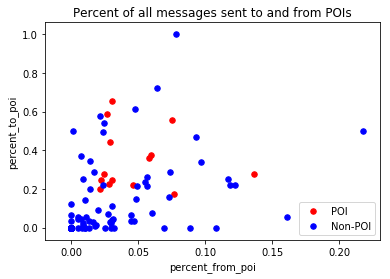

In [14]:
#Now I want to plot and look at my new features
data = featureFormat(data_dict, features_list_n, sort_keys = False)
poi=data[:,0]
percent_from_poi = data[:,20]
percent_to_poi = data[:,21]

plt.scatter(percent_from_poi[poi==1],percent_to_poi[poi==1],c='red',s=30,label='POI')
plt.scatter(percent_from_poi[poi==0],percent_to_poi[poi==0],c='blue',s=30,label='Non-POI')

plt.xlabel("percent_from_poi")
plt.ylabel("percent_to_poi")
plt.legend(loc='lower right')
plt.title("Percent of all messages sent to and from POIs")
plt.show()

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.DataFrame.from_dict(data_dict, orient='index',
                       columns=['poi',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'percent_from_poi',
 'percent_to_poi'])

,poi,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,salary,deferral_payments,total_payments,loan_advances,...,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,percent_from_poi,percent_to_poi
ALLEN PHILLIP K,False,2902,47,2195,65,1407,201955,2869717,4484442,NaN,...,-3081055,1729541,13868,1729541,152,304805,126027,NaN,0.016196,0.029613
BADUM JAMES P,False,NaN,NaN,NaN,NaN,NaN,NaN,178980,182466,NaN,...,NaN,257817,3486,257817,NaN,NaN,NaN,NaN,0.000000,0.000000
BANNANTINE JAMES M,False,566,39,29,0,465,477,NaN,916197,NaN,...,-5104,5243487,56301,4046157,864523,NaN,1757552,NaN,0.068905,0.000000
BAXTER JOHN C,False,NaN,NaN,NaN,NaN,NaN,267102,1295738,5634343,NaN,...,-1386055,10623258,11200,6680544,2660303,1586055,3942714,NaN,0.000000,0.000000
BAY FRANKLIN R,False,NaN,NaN,NaN,NaN,NaN,239671,260455,827696,NaN,...,-201641,63014,129142,NaN,69,NaN,145796,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WINOKUR JR. HERBERT S,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84992,NaN,...,-25000,NaN,1413,NaN,NaN,NaN,NaN,108579,0.000000,0.000000
WODRASKA JOHN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189583,NaN,...,NaN,NaN,NaN,NaN,189583,NaN,NaN,NaN,0.000000,0.000000
WROBEL BRUCE,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,139130,NaN,139130,NaN,NaN,NaN,NaN,0.000000,0.000000
YEAGER F SCOTT,True,NaN,NaN,NaN,NaN,NaN,158403,NaN,360300,NaN,...,NaN,11884758,53947,8308552,147950,NaN,3576206,NaN,0.000000,0.000000


In [16]:
for feature in features_list_n:
    print feature
    feature = [item[feature] for k, item in 
    data_dict.iteritems() if not item[feature] == "NaN"]
    print ('min is: %d' % min(feature))
    print ('max is: %d' % max(feature))

poi
min is: 0
max is: 1
to_messages
min is: 57
max is: 15149
from_poi_to_this_person
min is: 0
max is: 528
from_messages
min is: 12
max is: 14368
from_this_person_to_poi
min is: 0
max is: 609
shared_receipt_with_poi
min is: 2
max is: 5521
salary
min is: 477
max is: 1111258
deferral_payments
min is: -102500
max is: 6426990
total_payments
min is: 148
max is: 103559793
loan_advances
min is: 400000
max is: 81525000
bonus
min is: 70000
max is: 8000000
restricted_stock_deferred
min is: -1787380
max is: 15456290
deferred_income
min is: -3504386
max is: -833
total_stock_value
min is: -44093
max is: 49110078
expenses
min is: 148
max is: 228763
exercised_stock_options
min is: 3285
max is: 34348384
other
min is: 2
max is: 10359729
long_term_incentive
min is: 69223
max is: 5145434
restricted_stock
min is: -2604490
max is: 14761694
director_fees
min is: 3285
max is: 137864
percent_from_poi
min is: 0
max is: 0
percent_to_poi
min is: 0
max is: 1


In [17]:
def findKbestFeatures(data_dict, features_list_n, k):
    from sklearn.feature_selection import f_classif
    data = featureFormat(data_dict, features_list_n)
    labels, features = targetFeatureSplit(data)

    k_best = SelectKBest(f_classif, k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    print("sorted_pairs", sorted_pairs)
    k_best_features = dict(sorted_pairs[:k])

    return k_best_features
    


In [18]:

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


In [19]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Example starting point. Try investigating other evaluation techniques!
'''
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from time import time
clf = GaussianNB()

# train
t0 = time()
clf.fit(features_train, labels_train)
print "\ntraining time:", round(time()-t0, 3), "s"

# predict
t0 = time()
pred = clf.predict(features_test)
print "predicting time:", round(time()-t0, 3), "s"

accuracy = accuracy_score(pred, labels_test)

print '\naccuracy = {0}'.format(accuracy)
'''

'\nfrom sklearn.cross_validation import train_test_split\nfeatures_train, features_test, labels_train, labels_test =     train_test_split(features, labels, test_size=0.3, random_state=42)\n\n# Provided to give you a starting point. Try a variety of classifiers.\nfrom sklearn.naive_bayes import GaussianNB\nfrom time import time\nclf = GaussianNB()\n\n# train\nt0 = time()\nclf.fit(features_train, labels_train)\nprint "\ntraining time:", round(time()-t0, 3), "s"\n\n# predict\nt0 = time()\npred = clf.predict(features_test)\nprint "predicting time:", round(time()-t0, 3), "s"\n\naccuracy = accuracy_score(pred, labels_test)\n\nprint \'\naccuracy = {0}\'.format(accuracy)\n'

In [20]:
'''
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


from sklearn import tree
from time import time
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
dt_param = {'criterion':('gini', 'entropy'),
'splitter':('best','random')}
dt_grid_search = GridSearchCV(estimator = clf, param_grid = dt_param)
# train
t0 = time()
clf.fit(features_train, labels_train)
print "\ntraining time:", round(time()-t0, 3), "s"

# predict
t0 = time()
pred = clf.predict(features_test)
print "predicting time:", round(time()-t0, 3), "s"

accuracy = accuracy_score(pred, labels_test)

print '\naccuracy = {0}'.format(accuracy)

'''

'\nfrom sklearn.cross_validation import train_test_split\nfeatures_train, features_test, labels_train, labels_test =     train_test_split(features, labels, test_size=0.3, random_state=42)\n\n\nfrom sklearn import tree\nfrom time import time\nfrom sklearn.model_selection import GridSearchCV\nclf = tree.DecisionTreeClassifier()\ndt_param = {\'criterion\':(\'gini\', \'entropy\'),\n\'splitter\':(\'best\',\'random\')}\ndt_grid_search = GridSearchCV(estimator = clf, param_grid = dt_param)\n# train\nt0 = time()\nclf.fit(features_train, labels_train)\nprint "\ntraining time:", round(time()-t0, 3), "s"\n\n# predict\nt0 = time()\npred = clf.predict(features_test)\nprint "predicting time:", round(time()-t0, 3), "s"\n\naccuracy = accuracy_score(pred, labels_test)\n\nprint \'\naccuracy = {0}\'.format(accuracy)\n\n'

#### With some reasearch, I determined the better way to organize my classifiers was to create functions.
I added a function definition for each, and used Udacity code to print the training & testing time. I then called the function and tested it below.

In [21]:
from time import time

def naive_bayes_clf(features_train, features_test, labels_train, labels_test):
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print "\ntraining time:", round(time()-t0, 3), "s"

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print "predicting time:", round(time()-t0, 3), "s"
    accuracy = accuracy_score(pred, labels_test)
    print '\naccuracy = {0}'.format(accuracy)

    return clf


def svm_clf(features_train, features_test, labels_train, labels_test):
    from sklearn.svm import SVC
    clf = SVC(kernel="linear", C=1000)
    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print "\ntraining time:", round(time()-t0, 3), "s"

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print "predicting time:", round(time()-t0, 3), "s"
    accuracy = accuracy_score(pred, labels_test)
    print '\naccuracy = {0}'.format(accuracy)

    return clf


def decision_tree_clf(features_train, features_test, labels_train, labels_test):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print "\ntraining time:", round(time()-t0, 3), "s"

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print "predicting time:", round(time()-t0, 3), "s"
    accuracy = accuracy_score(pred, labels_test)
    print '\naccuracy = {0}'.format(accuracy)

    return clf

def adaboost_clf(features_train, features_test, labels_train, labels_test):
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier(learning_rate=1, algorithm='SAMME', n_estimators=23)
    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print "\ntraining time:", round(time()-t0, 3), "s"

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print "predicting time:", round(time()-t0, 3), "s"
    accuracy = accuracy_score(pred, labels_test)
    print '\naccuracy = {0}'.format(accuracy)

    return clf

In [22]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
#!/usr/bin/pickle

#clf = naive_bayes_clf(features_train, features_test, labels_train, labels_test)
#clf = svm_clf(features_train, features_test, labels_train, labels_test)
clf = decision_tree_clf(features_train, features_test, labels_train, labels_test)
#clf = adaboost_clf(features_train, features_test, labels_train, labels_test)


training time: 0.0 s
predicting time: 0.007 s

accuracy = 0.906976744186


In [23]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list_n)

In [24]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    #pprint.pprint(feature_list)
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.82747	Precision: 0.35686	Recall: 0.36650	F1: 0.36162	F2: 0.36453
	Total predictions: 15000	True positives:  733	False positives: 1321	False negatives: 1267	True negatives: 11679



In [25]:
pprint.pprint(features_list_n)

['poi',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'director_fees',
 'percent_from_poi',
 'percent_to_poi']
